# ML-Driven Bank Churn Prediction: Unlocking Customer Retention Insights, Analyzing Demographic and Financial Factors

## Install and import the required libraries for the project

In [147]:
# !pip install xgboost
# !pip install skimpy
# !pip install summarytools

In [1]:
import os
import chardet
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
import regex as re
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from skimpy import skim
from summarytools import dfSummary

## Import the Data

In [2]:
df = pd.read_csv('BankChurn.csv')

In [3]:
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.shape

(10000, 13)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10000  │ │ int32       │ 8     │                                                          │
│ │ Number of columns │ 13     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column     ┃ NA ┃ NA % ┃ mean     ┃ sd     ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ CustomerId │  0 │    0 │ 15690000 │  71940 │ 15570000 │ 15630000 │ 15690000 │ 15750000 │ 15820000 │ ▇▇▇▇▇▇ │  │
│ │ CreditScor │  0 │    0 │    650.5 │  96.65 │      350 │      584 │      652 │      718 │      850 │  ▂▅▇▆▃ │  │
│ │ e          │    │      │          │        │          │          │          │          │          │        │  │
│ │ Age        │  0 │    0 │    38.92 │  10.49 │       18 │       32 │       37 │       44 │       92 │  ▃▇▃▁  │  │
│ │ Tenure     │  0 │    0 │    5.013 │  2.892 │        0 │        3 │        5 │        7 │       10 │ ▆▇▃▇▇▆ │  │
│ │ Balance    │  0 │    0 │    76490 │  62400 │        0 │        0 │    97200 │   127600 │   250900 │ ▇▂▆▅▁  │  │
│ │ NumOfProdu │  0 │    0 │     1.53 │ 0.5817 │        1 │        1 │        1 │        2 │        4 │  ▇ ▇   │  │
│ │ cts        │    │      │          │        │          │          │          │          │          │        │  │
│ │ HasCrCard  │  0 │    0 │   0.7055 │ 0.4558 │        0 │        0 │        1 │        1 │        1 │ ▃    ▇ │  │
│ │ IsActiveMe │  0 │    0 │   0.5151 │ 0.4998 │        0 │        0 │        1 │        1 │        1 │ ▇    ▇ │  │
│ │ mber       │    │      │          │        │          │          │          │          │          │        │  │
│ │ EstimatedS │  0 │    0 │   100100 │  57510 │    11.58 │    51000 │   100200 │   149400 │   200000 │ ▇▇▇▇▇▇ │  │
│ │ alary      │    │      │          │        │          │          │          │          │          │        │  │
│ │ Exited     │  0 │    0 │   0.2037 │ 0.4028 │        0 │        0 │        0 │        0 │        1 │ ▇    ▂ │  │
│ └────────────┴────┴──────┴──────────┴────────┴──────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃          ┃             ┃        ┃        ┃ chars per   ┃ words per   ┃             ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest ┃ longest     ┃ min    ┃ max    ┃ row         ┃ row         ┃ total words ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ Surname   │  0 │    0 │ He       │ Collingridg │ Abazu  │ Zuyeva │        6.43 │           1 │       10055 │  │
│ │           │    │      │          │ e de        │    

# Exploratory Data Analysis - Analyzing the columns

## Columns CustomerId and Surname

In [9]:
df.CustomerId.value_counts().sum()

10000

In [10]:
#Columns CustomerId and Surname are not needed and can be dropped

df.drop(columns=['CustomerId','Surname'],axis=1, inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Column CreditScore

In [12]:
#df.CreditScore.value_counts()
#The column does not need any processing

## Column Geography

In [13]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [14]:
# Performing One-Hot Encoding on the column Geography

onehot_encoder = OneHotEncoder()
df=pd.get_dummies(df, columns=['Geography'],dtype=int)

In [15]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


## Column Gender

In [16]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [17]:
df['Gender']=np.where(df['Gender']=='Female',0,1)

In [18]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [19]:
df.Gender.value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

## Column Age

In [20]:
# df.Age.value_counts()
# Column Age does not need any Processing

## Column Tenure

In [21]:
# df.Age.value_counts()
# Column Tenure does not need any Processing

## Column Balance

In [22]:
# df.Balance.value_counts()
# Column Balance does not need any Processing. May need scaling

## Column NumOfProducts

In [23]:
df.NumOfProducts.value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [24]:
# Column NumOfProducts does not need any Processing

## Column HasCrCard

In [25]:
df.HasCrCard.value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [26]:
# Column HasCrCard does not need any Processing.

## Column IsActiveMember

In [27]:
df.IsActiveMember.value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

## Column EstimatedSalary

In [28]:
# df.EstimatedSalary.value_counts()
# Column EstimatedSalarry does not need any Processing. May need scaling.

## Target Column Exited

In [29]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

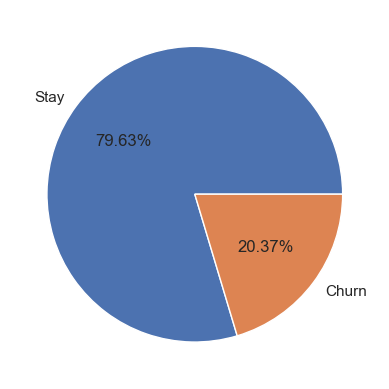

In [30]:
plt.pie(df['Exited'].value_counts(),labels=['Stay','Churn'],autopct='%.2f%%')
plt.show()

In [31]:
# Column Exited is imbalanced. However, since this is Bank Churn data, no processing will be done

## Checking for Outliers

In [32]:
cols = ['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',]

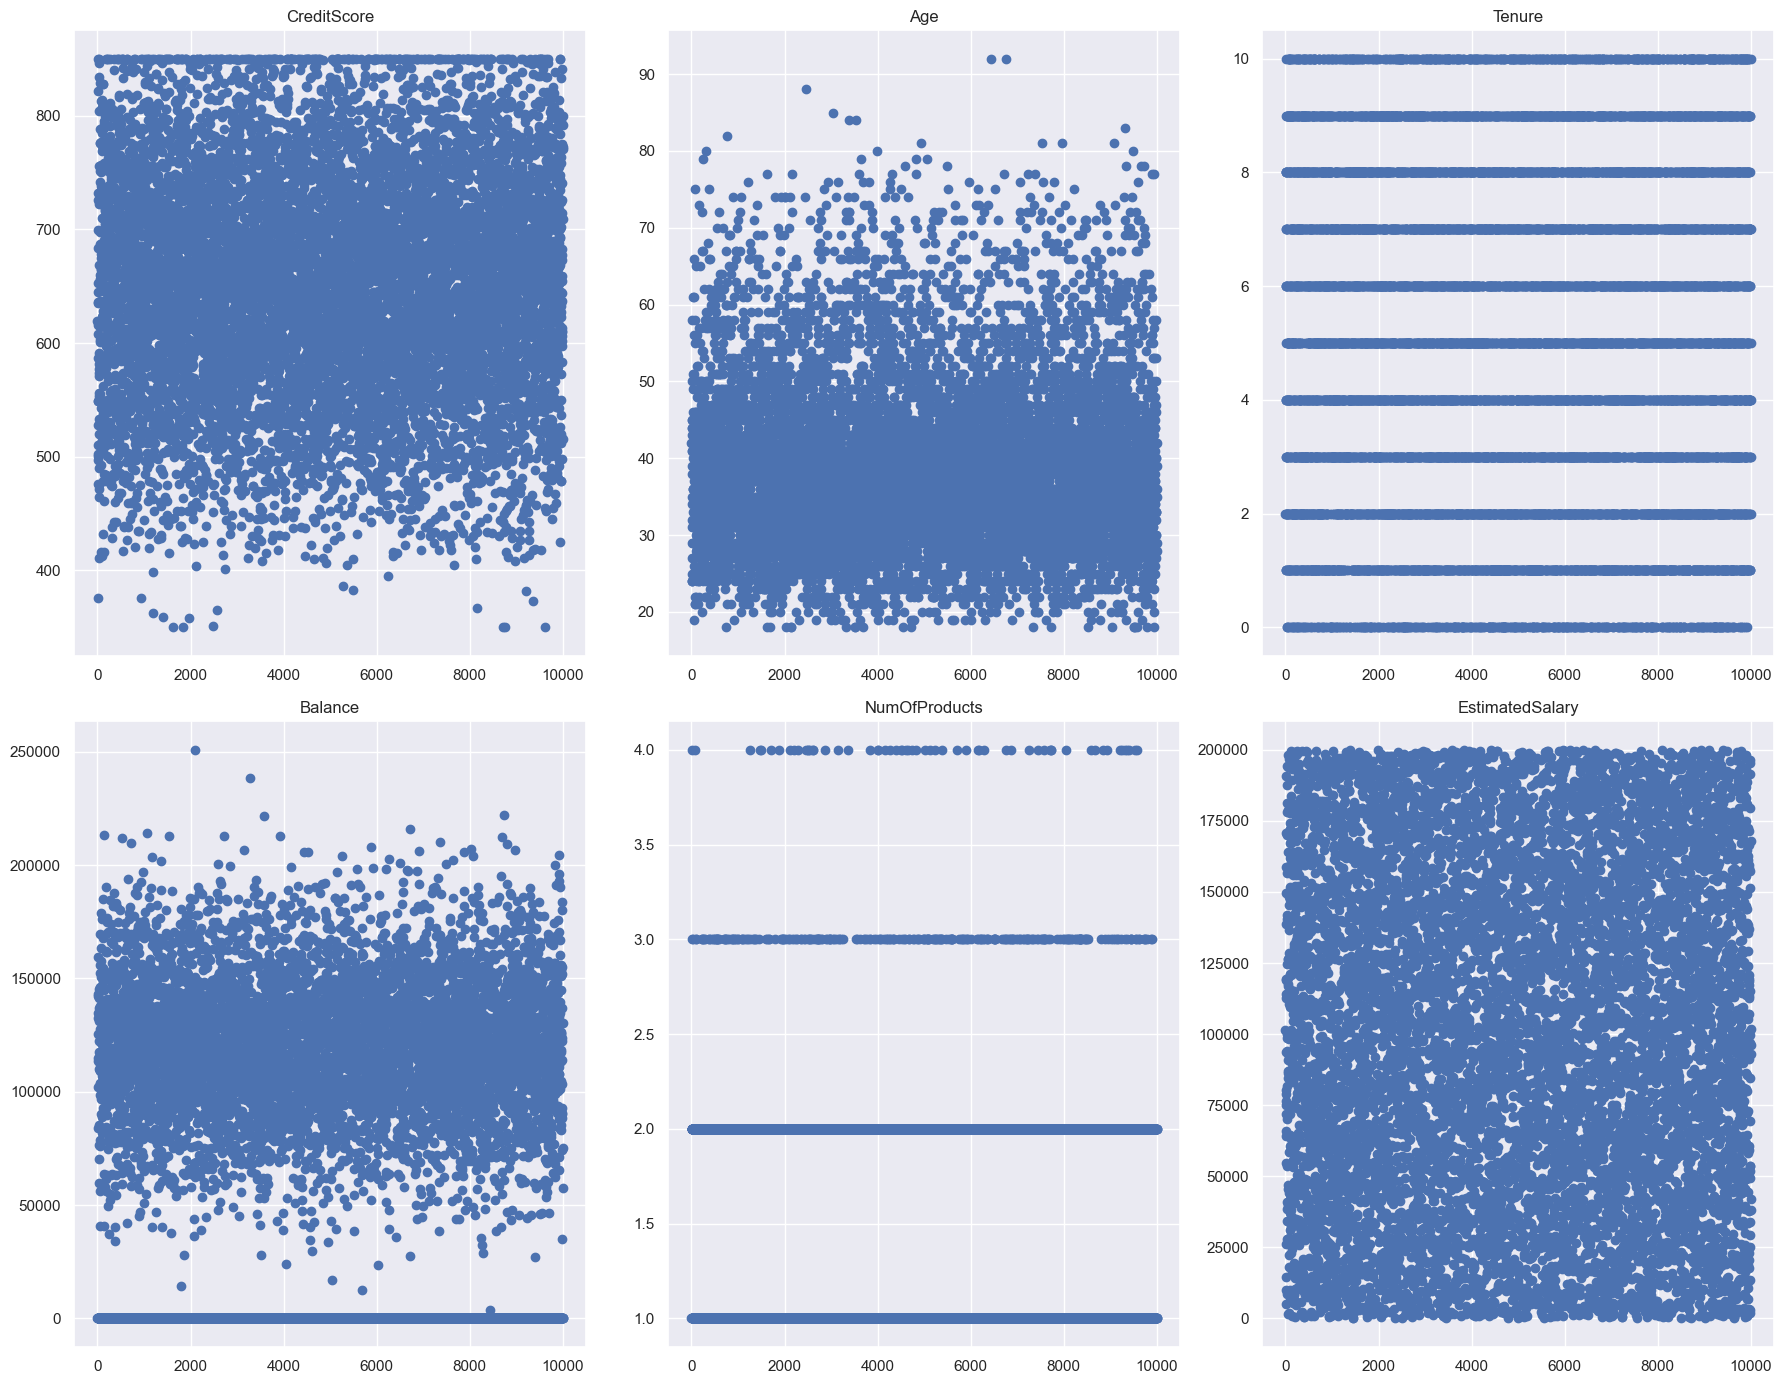

In [33]:
f,ax=plt.subplots(2,3,figsize=(18,14),dpi=100)

ind=0
try:
    for i in range(2):
        for j in range(3):
            ax[i,j].scatter(y=df[cols[ind]],x=df[cols[ind]].index)
            ax[i,j].set_title(cols[ind])
            ind+=1
        plt.tight_layout()
    plt.show()
except:
    pass

In [34]:
df[df['Age']>70].count()

CreditScore          133
Gender               133
Age                  133
Tenure               133
Balance              133
NumOfProducts        133
HasCrCard            133
IsActiveMember       133
EstimatedSalary      133
Exited               133
Geography_France     133
Geography_Germany    133
Geography_Spain      133
dtype: int64

In [35]:
# Capping the age limit at 70 as age 70 and above can be considered as one category

df['Age']=np.where(df['Age']>70,70,df['Age'])

In [36]:
df[df['Balance']>200000].count()

CreditScore          34
Gender               34
Age                  34
Tenure               34
Balance              34
NumOfProducts        34
HasCrCard            34
IsActiveMember       34
EstimatedSalary      34
Exited               34
Geography_France     34
Geography_Germany    34
Geography_Spain      34
dtype: int64

In [37]:
# Capping the balance at 200000 as balance 200000 and above can be considered as one category

df['Balance']=np.where(df['Balance']>200000,200000,df['Balance'])

In [38]:
df[df['NumOfProducts']==4].count()

CreditScore          60
Gender               60
Age                  60
Tenure               60
Balance              60
NumOfProducts        60
HasCrCard            60
IsActiveMember       60
EstimatedSalary      60
Exited               60
Geography_France     60
Geography_Germany    60
Geography_Spain      60
dtype: int64

In [39]:
# Capping the products at 3 as product count 3 and above can be considered as one category

In [40]:
df['NumOfProducts']=np.where(df['NumOfProducts']>3,3,df['NumOfProducts'])

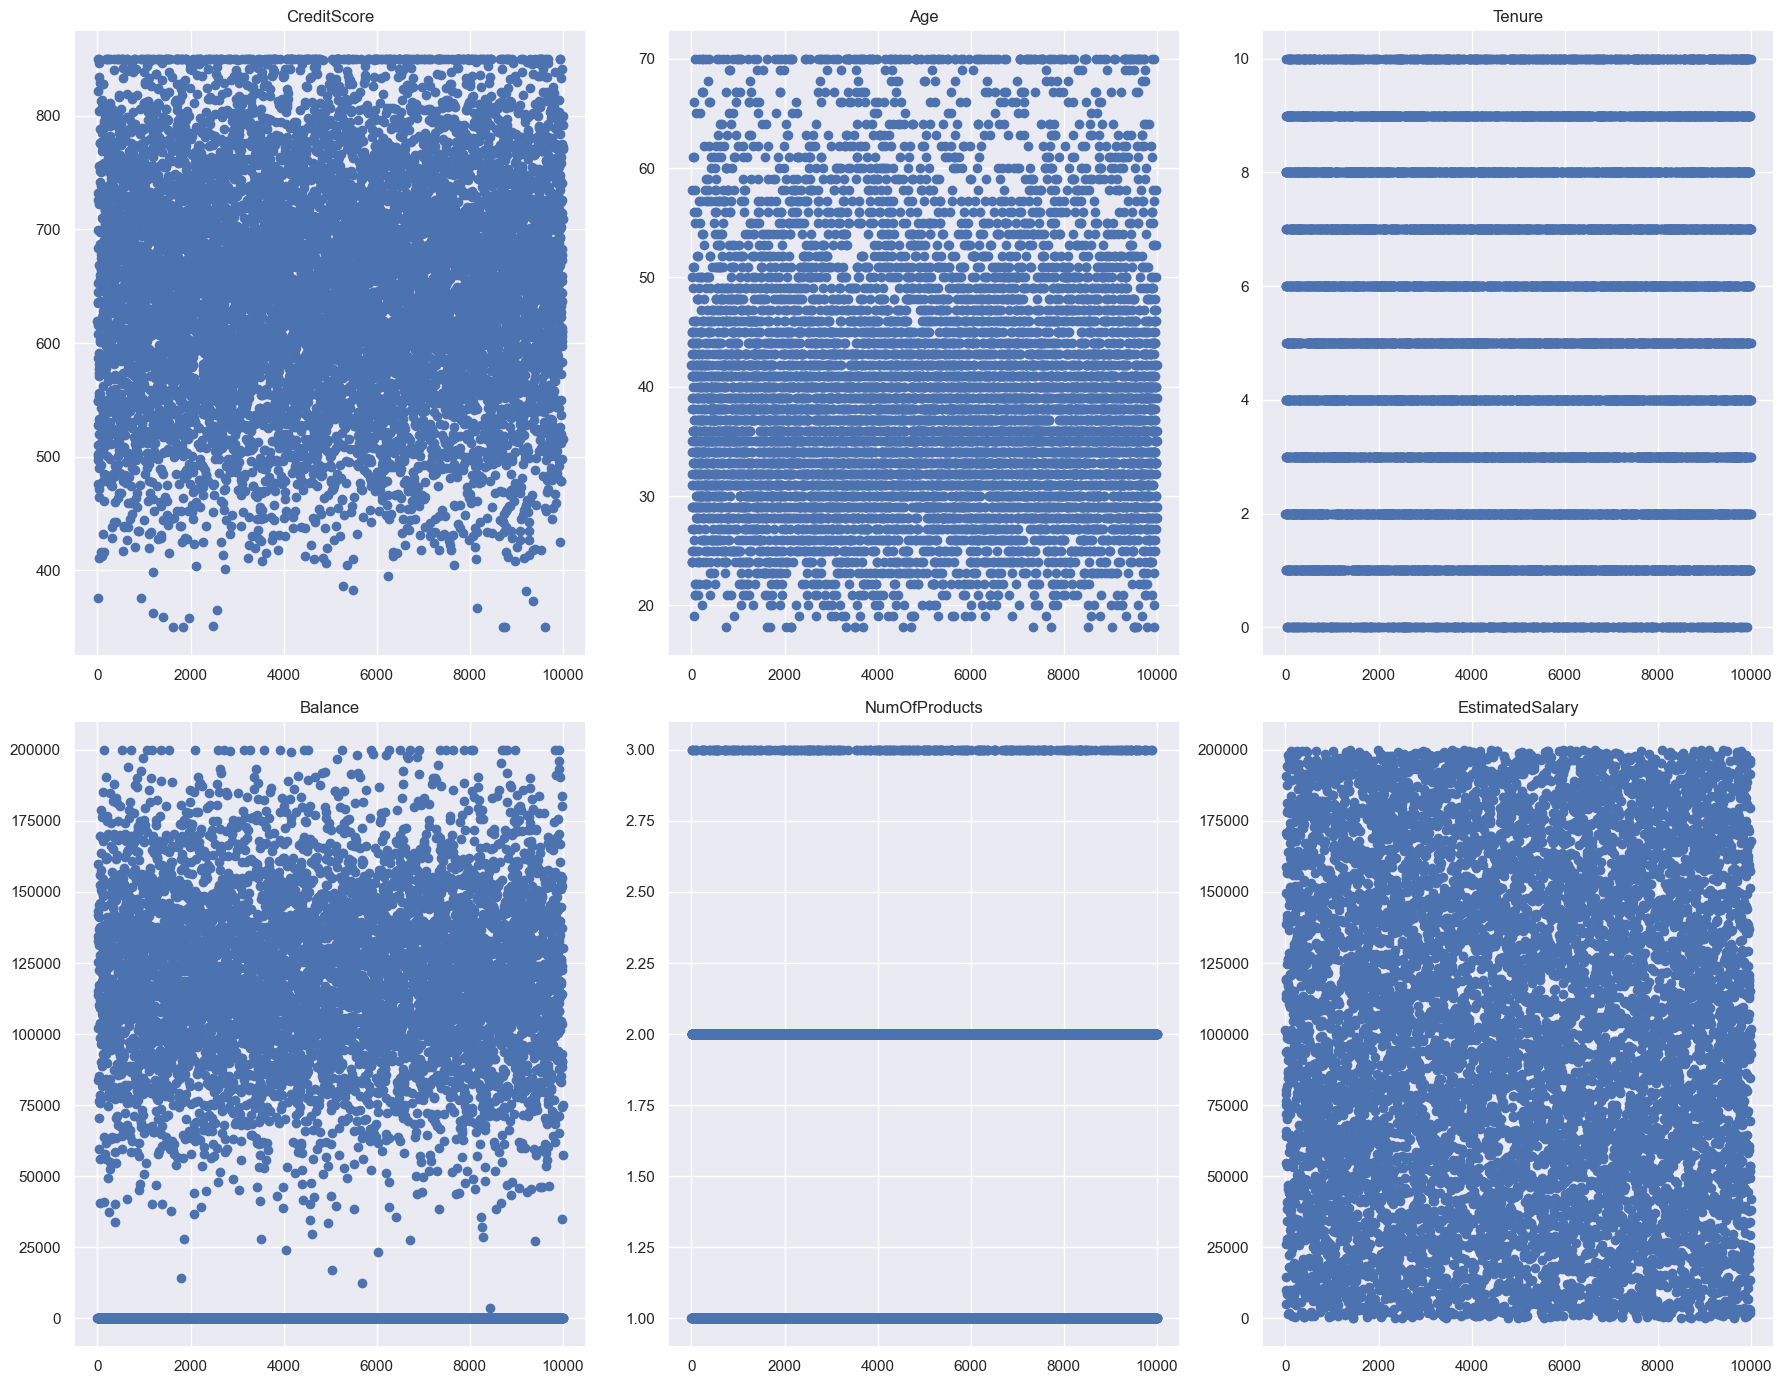

In [41]:
f,ax=plt.subplots(2,3,figsize=(18,14),dpi=100)

ind=0
try:
    for i in range(2):
        for j in range(3):
            ax[i,j].scatter(y=df[cols[ind]],x=df[cols[ind]].index)
            ax[i,j].set_title(cols[ind])
            ind+=1
        plt.tight_layout()
    plt.show()
except:
    pass

## Separate the Target Column from the dataset

In [42]:
x=df.drop('Exited',axis=1)

In [43]:
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [44]:
y=pd.DataFrame(df['Exited'])

In [45]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


## Scale the Dataset

In [46]:
x_sc=pd.DataFrame(x[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
x_nsc=x.drop(['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary'],axis=1)

In [47]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x_sc)

In [48]:
x_sc=pd.DataFrame(x_sc,columns=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary'])

In [49]:
x=pd.concat([x_sc,x_nsc],axis=1)

## Split the Data into training and testing

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=142)

## Hyperparameter tuning in xgboost

In [54]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic')

param_grid = {'n_estimators':[50,100,200],'max_depth':[3,5,7],'learning_rate':[0.01,0.1,0.2],}
grid_search = GridSearchCV(estimator=xgb_model,param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Hyperparameters :",grid_search.best_params_)

best_model = grid_search.best_estimator_

accuracy = best_model.score(x_test, y_test)
print("Test Accuracy :", accuracy)

Best Hyperparameters : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Test Accuracy : 0.873


In [58]:
learning_rate = grid_search.best_params_['learning_rate']
max_depth = grid_search.best_params_['max_depth']
n_estimators = grid_search.best_params_['n_estimators']

# XGBoost Classifier

In [59]:
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
#!pip install xgboost
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators, objective='binary:logistic')

xgb_classifier.fit(x_train, y_train)
y_pred_xgb = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
print()
print(f"Accuracy : {accuracy}")
print()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_xgb)
#classification_report = classification_report(y_test, y_pred)
#print(f"classification_report : {classification_report}")

for i, v in enumerate(['p1']):
    print(f"Precision : {precision[i]}")
    print(f"Recall : {recall[i]}")
    print(f"F1_Score : {f1_score[i]}")
    print()


Accuracy : 0.873

Precision : 0.8935926773455377
Recall : 0.9582822085889571
F1_Score : 0.9248075784487862

